In [1]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
wav = r'.\CantinaBand60.wav' # Original file
(file_dir, file_id) = os.path.split(wav)

print("Path : ", file_dir)
print("Name : ", file_id)

Path :  .
Name :  CantinaBand60.wav


In [3]:
sample_rate, data = wavfile.read(wav) # sr : sampling rate, x : wave data array

print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(sample_rate,data.shape,len(data)/sample_rate))

Sample rate:22050, data size:(1323000,), duration:60.0 seconds


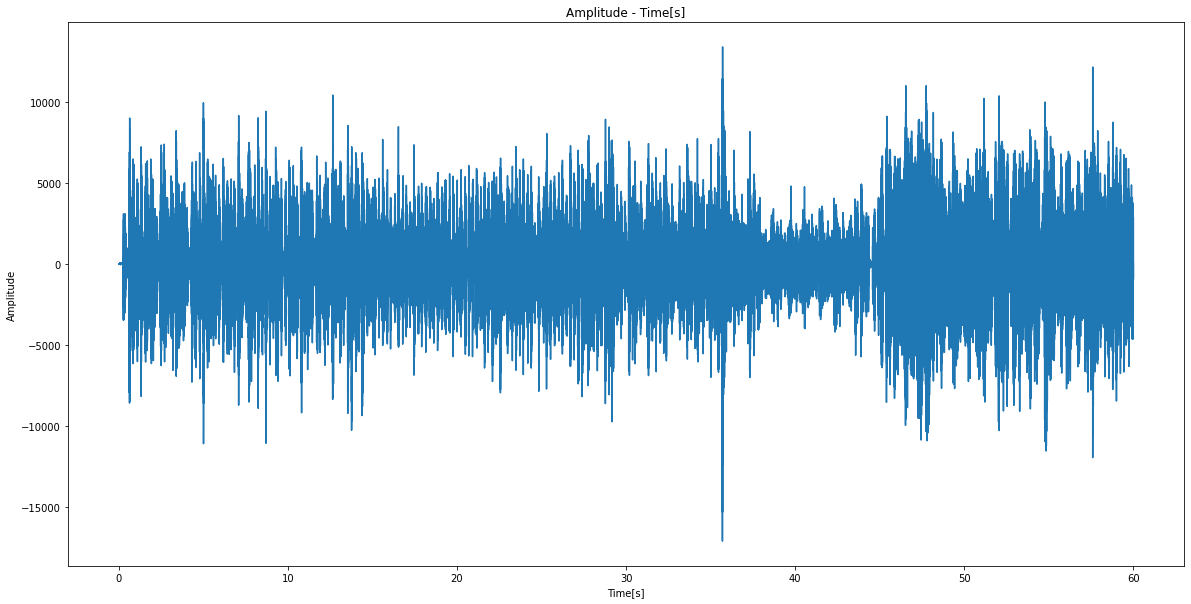

In [4]:
time = np.linspace(0, len(data)/sample_rate, len(data))

plt.figure(figsize=(20,10))
plt.plot(time, data)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [5]:
sample_rate, data

(22050, array([   3,    7,    0, ..., -895, -980, -802], dtype=int16))

Text(0.5, 1.0, 'Power spectrum')

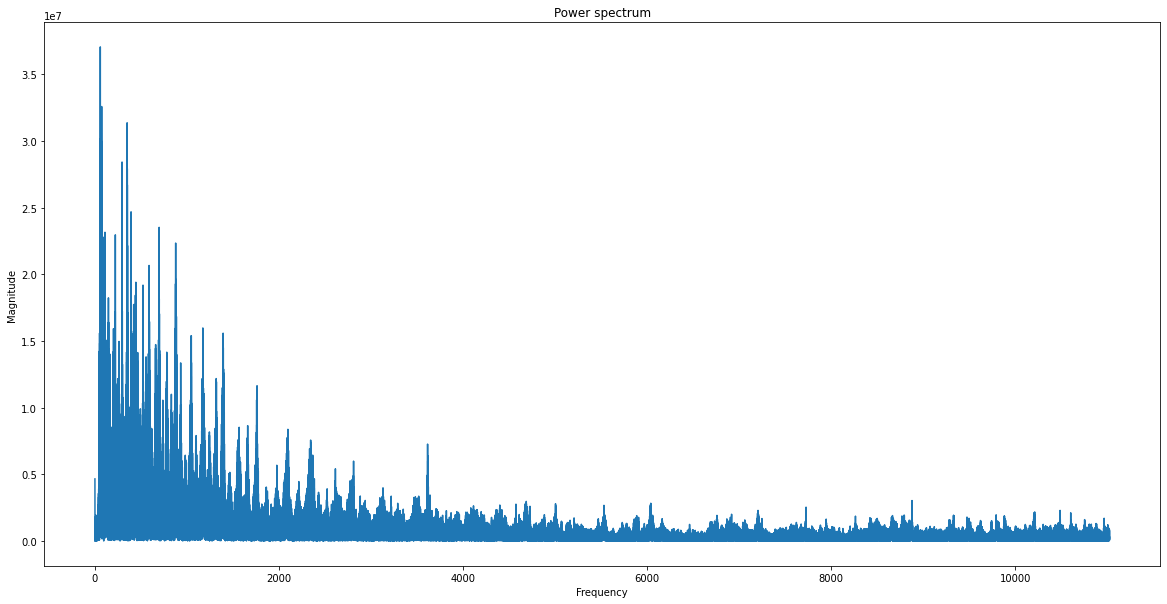

In [6]:
fft = np.fft.fft(data)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [7]:
b = signal.firwin(101, cutoff=1000, fs=sample_rate, pass_zero='lowpass')
# Length of the filter : odd number
# cutoff : Cutoff frequency of filter,
# fs : sampling frequdncy
# pass_zero{True, False,'bandpass','lowpass','highpass','bandstop'}, optional

data1 = signal.lfilter(b, [1.0], data)

Text(0.5, 1.0, 'Power spectrum')

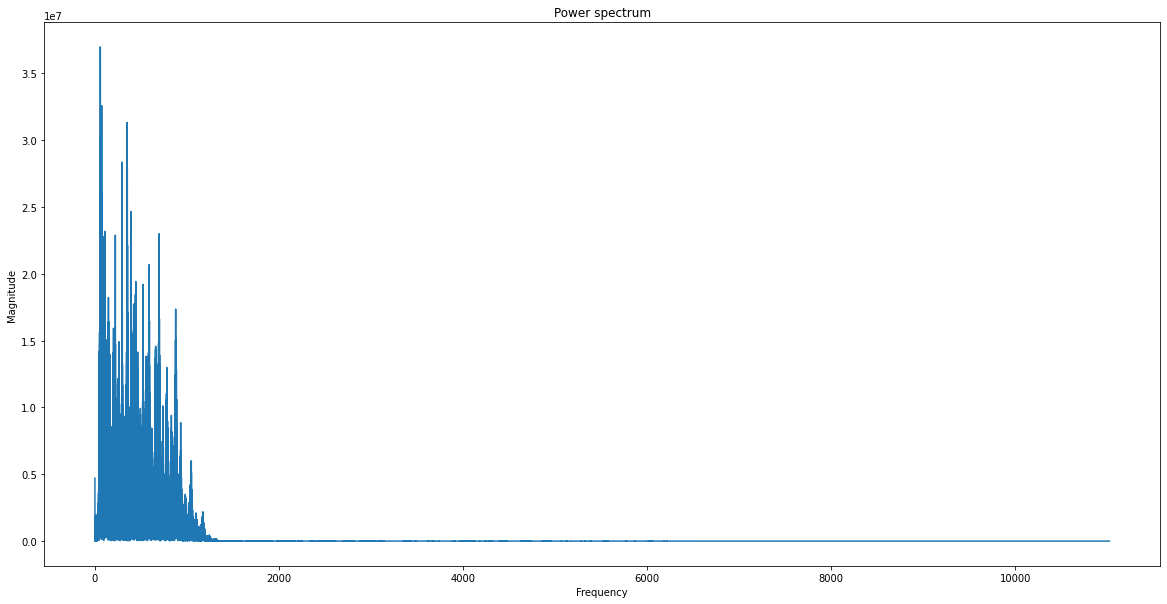

In [8]:
fft = np.fft.fft(data1)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

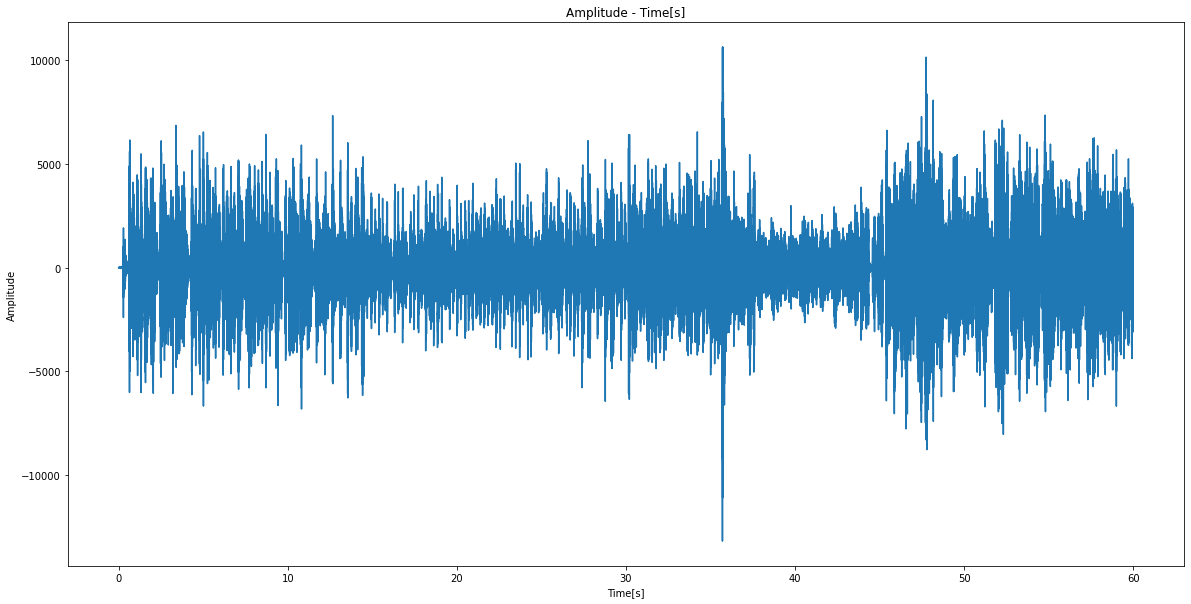

In [9]:
time = np.linspace(0, len(data1)/sample_rate, len(data1))

plt.figure(figsize=(20,10))
plt.plot(time, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [10]:
b = signal.firwin(101, cutoff=500, fs=sample_rate, pass_zero='lowpass')
data2 = signal.lfilter(b, [1.0], data)

Text(0.5, 1.0, 'Power spectrum')

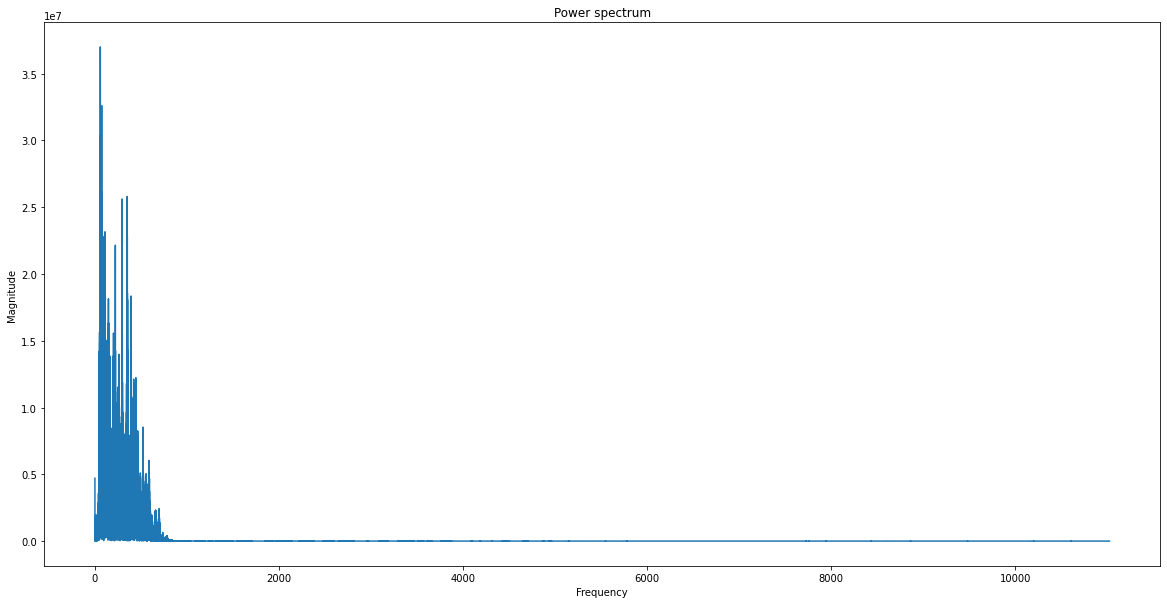

In [11]:
fft = np.fft.fft(data2)

magnitude = np.abs(fft) 

f = np.linspace(0, sample_rate, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,10))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

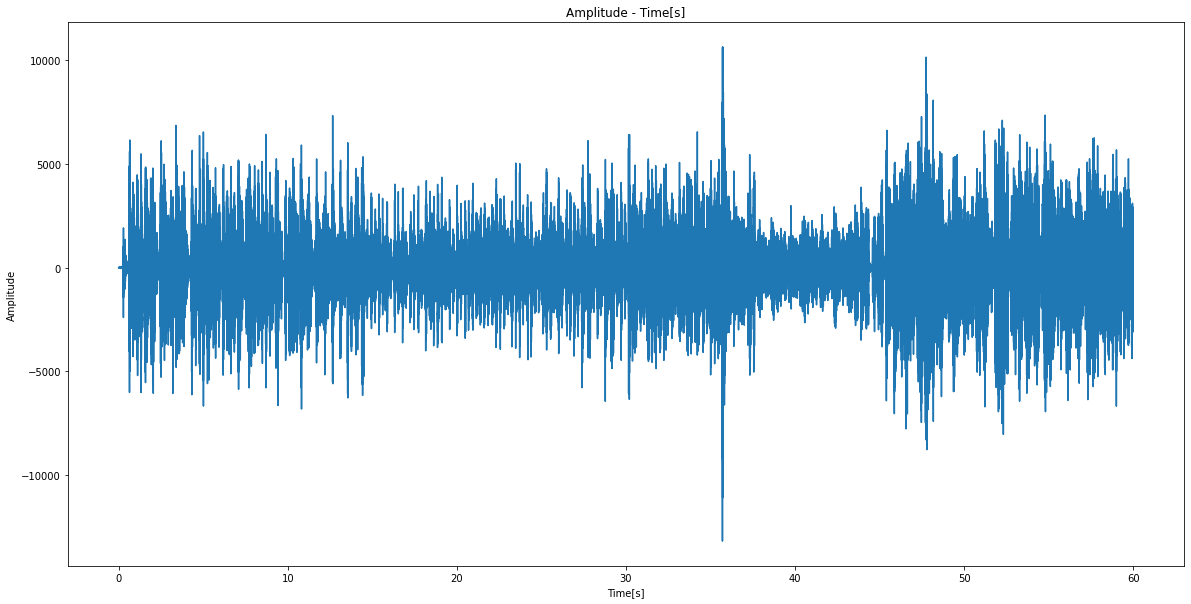

In [12]:
time = np.linspace(0, len(data2)/sample_rate, len(data2))

plt.figure(figsize=(20,10))
plt.plot(time, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time[s]")
plt.title("Amplitude - Time[s]")
plt.show()

In [13]:
wav_lpf = r'.\CantinaBand60_500hz.wav'
wavfile.write(wav_lpf, sample_rate, data2.astype(np.int16))

In [14]:
print("Sample rate:{0}, data size:{1}, duration:{2} seconds".format(sample_rate,data2.shape,len(data2)/sample_rate))

Sample rate:22050, data size:(1323000,), duration:60.0 seconds


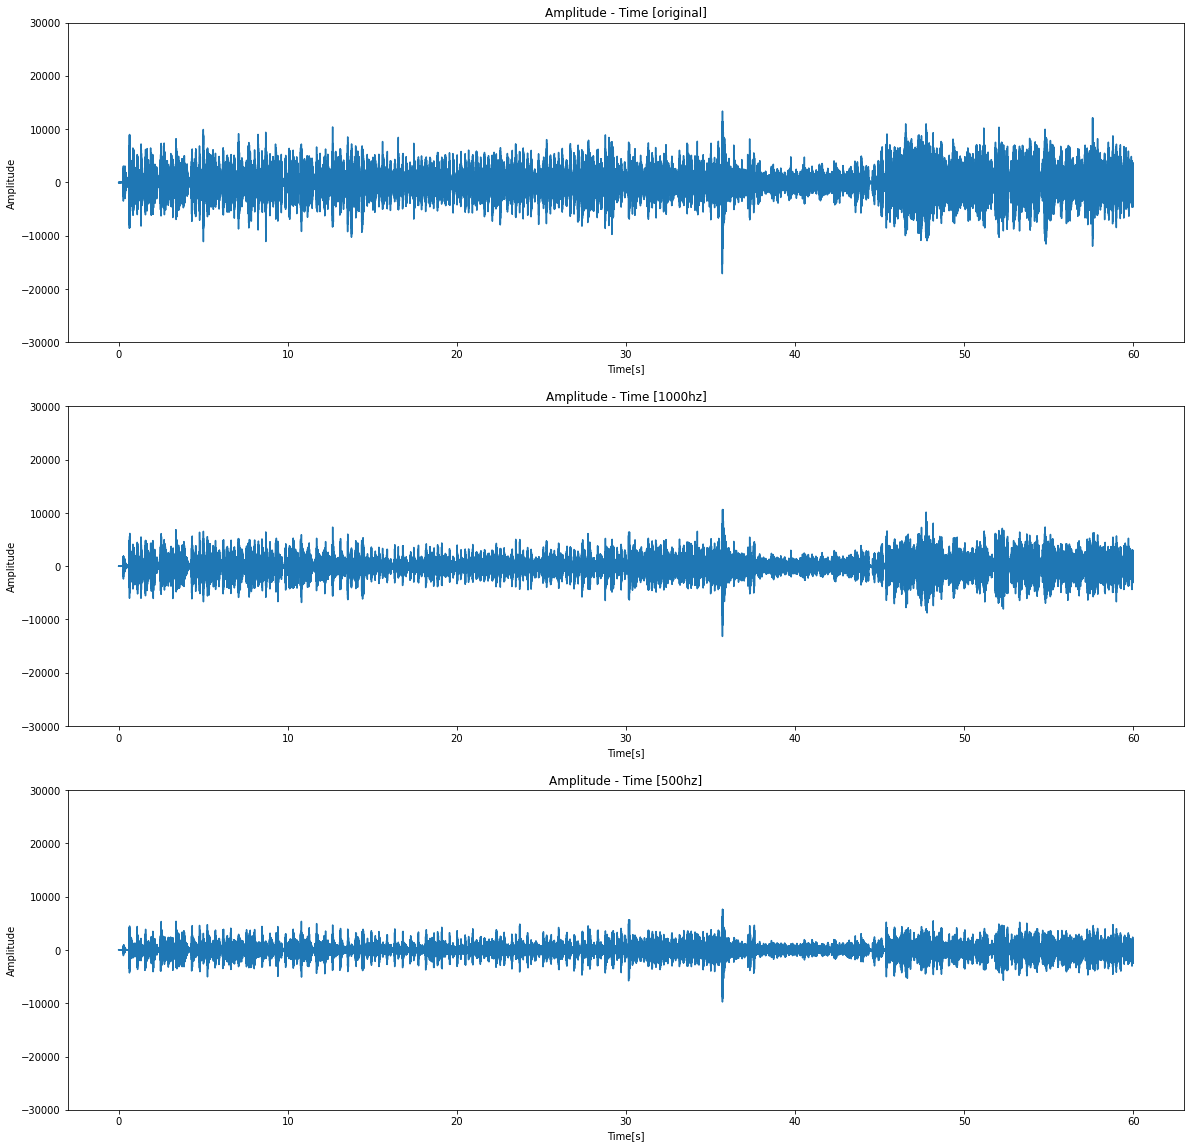

In [15]:
plt.figure(figsize=(20,20))

plot_a = plt.subplot(311)
plot_a.set_title('Amplitude - Time [original]')
plot_a.plot(time, data)
plot_a.set_xlabel('Time[s]')
plot_a.set_ylabel('Amplitude')
plot_a.set_ylim([-30000,30000])

plot_b = plt.subplot(312)
plot_b.set_title('Amplitude - Time [1000hz]')
plot_b.plot(time, data1)
plot_b.set_xlabel('Time[s]')
plot_b.set_ylabel('Amplitude')
plot_b.set_ylim([-30000,30000])

plot_c = plt.subplot(313)
plot_c.set_title('Amplitude - Time [500hz]')
plot_c.plot(time, data2)
plot_c.set_xlabel('Time[s]')
plot_c.set_ylabel('Amplitude')
plot_c.set_ylim([-30000,30000])

plt.show()